# Binary Classification with all Supervised Learning Models (includes:weak algorithms,ensemble(Bagging,Boosting))

## Analysing the Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# reading the file
df=pd.read_csv("aeroplane_training_data.csv")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [10]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
df.nunique()

id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              446
Arrival Delay in Minutes        

In [12]:
df.drop("id",inplace=True,axis=1)

In [13]:
df["satisfaction"]=df["satisfaction"].replace("neutral or dissatisfied","dissatisfied")

In [14]:
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


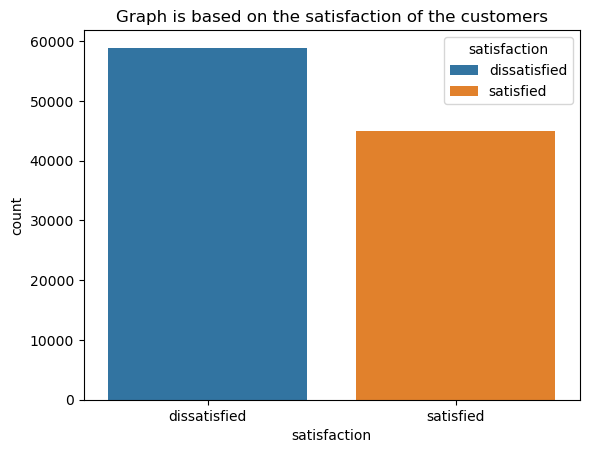

Checking the data is balanced or not


In [15]:
fig=plt.figure()
ax=sns.countplot(x="satisfaction",hue="satisfaction",data=df,legend=True)
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(
#         p.get_x() + p.get_width() / 2.,
#         height + 0.5,
#         int(height),
#         ha="center"
#     )
plt.title("Graph is based on the satisfaction of the customers")
plt.show()
print("Checking the data is balanced or not")

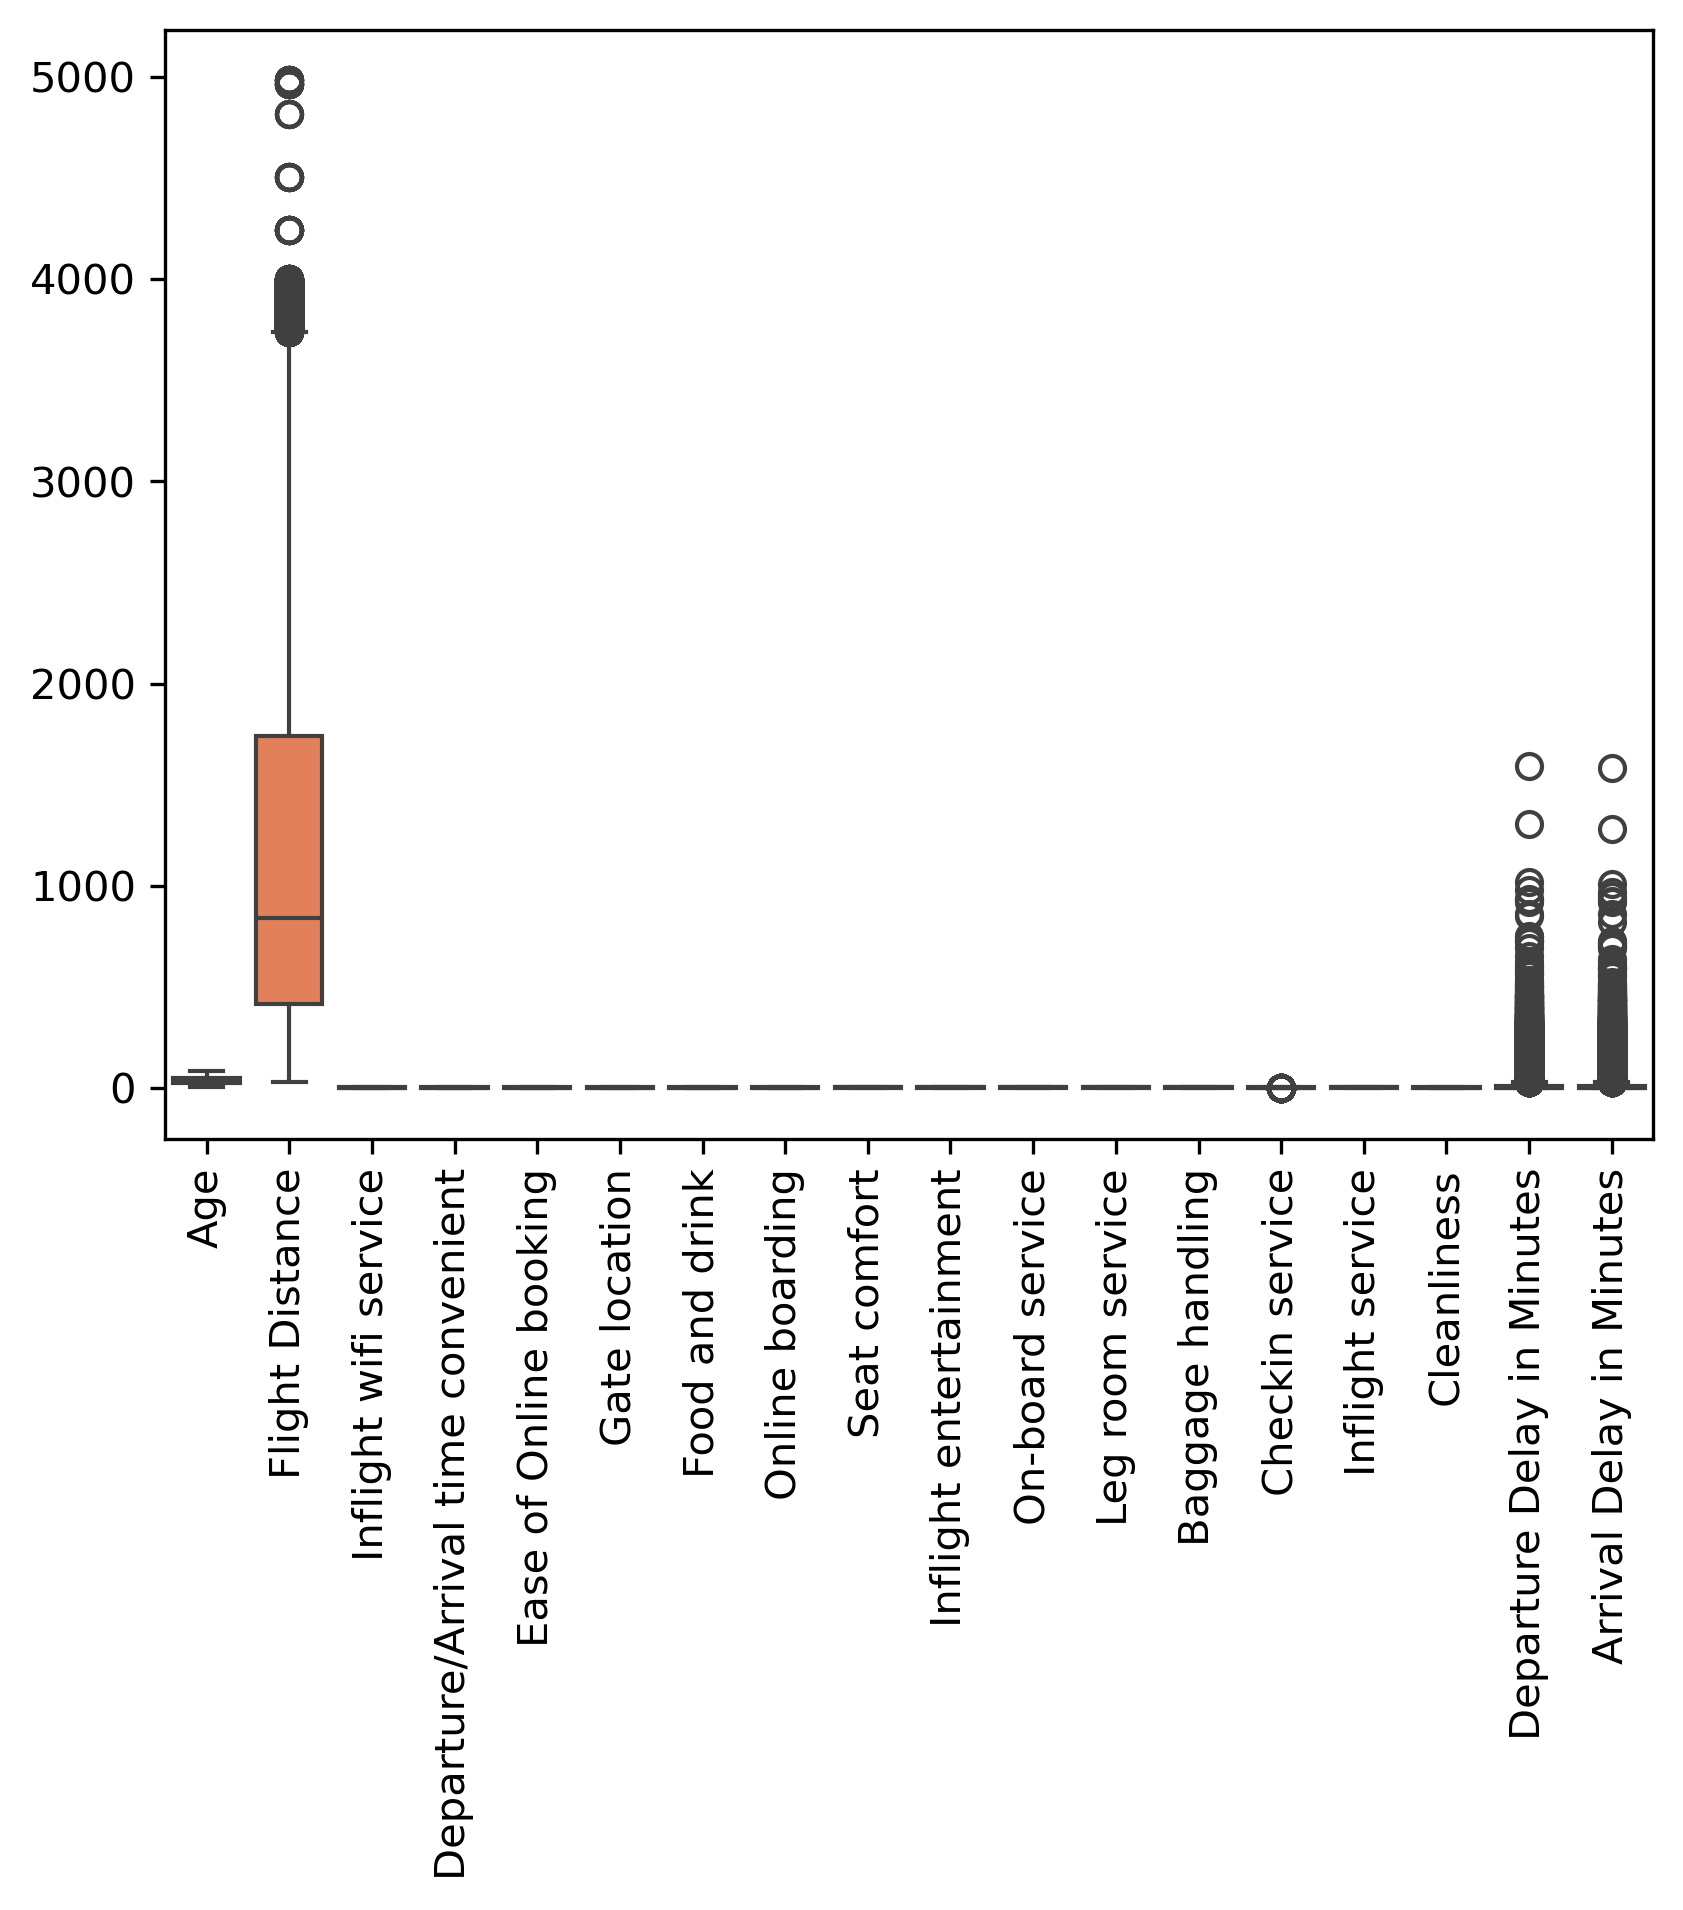

In [16]:
fig=plt.figure(dpi=300)
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [1]:
# from ydata_profiling import ProfileReport
# ProfileReport(df)

### cleaning the data by handling the diffierent types of errors and handling the missing values and doing the encoding 

In [115]:
imputer=SimpleImputer(strategy="median")
df["Arrival Delay in Minutes"]=imputer.fit_transform(df[["Arrival Delay in Minutes"]])

In [117]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [119]:
df["satisfaction"].value_counts()

satisfaction
dissatisfied    58879
satisfied       45025
Name: count, dtype: int64

In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
# applying the imputation technique
genders=pd.get_dummies(df["Gender"])
genders["Female"]=genders["Female"].replace({True:1,False:0})
genders["Male"]=genders["Male"].replace({True:1,False:0})
df.drop("Gender",axis=1,inplace=True)
df=pd.concat([df,genders],axis=1)
df

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male
0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,dissatisfied,0,1
1,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,dissatisfied,0,1
2,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,satisfied,1,0
3,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,dissatisfied,1,0
4,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,satisfied,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,...,1,4,2,3,2,3,0.0,dissatisfied,1,0
103900,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,...,5,5,5,5,4,0,0.0,satisfied,0,1
103901,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,...,2,4,5,5,4,7,14.0,dissatisfied,0,1
103902,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,...,5,1,5,4,1,0,0.0,dissatisfied,1,0


In [124]:
customer=pd.get_dummies(df["Customer Type"])
customer["Loyal Customer"]=customer["Loyal Customer"].replace({True:1,False:0})
customer["disloyal Customer"]=customer["disloyal Customer"].replace({True:1,False:0})
df.drop("Customer Type",axis=1,inplace=True)
df=pd.concat([df,customer],axis=1)
df

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer
0,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,...,4,5,5,25,18.0,dissatisfied,0,1,1,0
1,25,Business travel,Business,235,3,2,3,3,1,3,...,1,4,1,1,6.0,dissatisfied,0,1,0,1
2,26,Business travel,Business,1142,2,2,2,2,5,5,...,4,4,5,0,0.0,satisfied,1,0,1,0
3,25,Business travel,Business,562,2,5,5,5,2,2,...,1,4,2,11,9.0,dissatisfied,1,0,1,0
4,61,Business travel,Business,214,3,3,3,3,4,5,...,3,3,3,0,0.0,satisfied,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,Business travel,Eco,192,2,1,2,3,2,2,...,2,3,2,3,0.0,dissatisfied,1,0,0,1
103900,49,Business travel,Business,2347,4,4,4,4,2,4,...,5,5,4,0,0.0,satisfied,0,1,1,0
103901,30,Business travel,Business,1995,1,1,1,3,4,1,...,5,5,4,7,14.0,dissatisfied,0,1,0,1
103902,22,Business travel,Eco,1000,1,1,1,5,1,1,...,5,4,1,0,0.0,dissatisfied,1,0,0,1


In [125]:
travel=pd.get_dummies(df["Type of Travel"])
travel["Personal Travel"]=travel["Personal Travel"].replace({True:1,False:0})
travel["Business travel"]=travel["Business travel"].replace({True:1,False:0})
df.drop("Type of Travel",axis=1,inplace=True)
df=pd.concat([df,travel],axis=1)
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel
0,13,Eco Plus,460,3,4,3,1,5,3,5,...,5,25,18.0,dissatisfied,0,1,1,0,0,1
1,25,Business,235,3,2,3,3,1,3,1,...,1,1,6.0,dissatisfied,0,1,0,1,1,0
2,26,Business,1142,2,2,2,2,5,5,5,...,5,0,0.0,satisfied,1,0,1,0,1,0
3,25,Business,562,2,5,5,5,2,2,2,...,2,11,9.0,dissatisfied,1,0,1,0,1,0
4,61,Business,214,3,3,3,3,4,5,5,...,3,0,0.0,satisfied,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,Eco,192,2,1,2,3,2,2,2,...,2,3,0.0,dissatisfied,1,0,0,1,1,0
103900,49,Business,2347,4,4,4,4,2,4,5,...,4,0,0.0,satisfied,0,1,1,0,1,0
103901,30,Business,1995,1,1,1,3,4,1,5,...,4,7,14.0,dissatisfied,0,1,0,1,1,0
103902,22,Eco,1000,1,1,1,5,1,1,1,...,1,0,0.0,dissatisfied,1,0,0,1,1,0


In [127]:
ordinal=OrdinalEncoder(categories=[["Eco","Eco Plus",'Business']])
df["Class"]=ordinal.fit_transform(df[["Class"]])

In [129]:
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel
0,13,1.0,460,3,4,3,1,5,3,5,...,5,25,18.0,dissatisfied,0,1,1,0,0,1
1,25,2.0,235,3,2,3,3,1,3,1,...,1,1,6.0,dissatisfied,0,1,0,1,1,0
2,26,2.0,1142,2,2,2,2,5,5,5,...,5,0,0.0,satisfied,1,0,1,0,1,0
3,25,2.0,562,2,5,5,5,2,2,2,...,2,11,9.0,dissatisfied,1,0,1,0,1,0
4,61,2.0,214,3,3,3,3,4,5,5,...,3,0,0.0,satisfied,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,0.0,192,2,1,2,3,2,2,2,...,2,3,0.0,dissatisfied,1,0,0,1,1,0
103900,49,2.0,2347,4,4,4,4,2,4,5,...,4,0,0.0,satisfied,0,1,1,0,1,0
103901,30,2.0,1995,1,1,1,3,4,1,5,...,4,7,14.0,dissatisfied,0,1,0,1,1,0
103902,22,0.0,1000,1,1,1,5,1,1,1,...,1,0,0.0,dissatisfied,1,0,0,1,1,0


In [132]:
label=LabelEncoder()
df["satisfaction"]=label.fit_transform(df["satisfaction"])
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel
0,13,1.0,460,3,4,3,1,5,3,5,...,5,25,18.0,0,0,1,1,0,0,1
1,25,2.0,235,3,2,3,3,1,3,1,...,1,1,6.0,0,0,1,0,1,1,0
2,26,2.0,1142,2,2,2,2,5,5,5,...,5,0,0.0,1,1,0,1,0,1,0
3,25,2.0,562,2,5,5,5,2,2,2,...,2,11,9.0,0,1,0,1,0,1,0
4,61,2.0,214,3,3,3,3,4,5,5,...,3,0,0.0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,0.0,192,2,1,2,3,2,2,2,...,2,3,0.0,0,1,0,0,1,1,0
103900,49,2.0,2347,4,4,4,4,2,4,5,...,4,0,0.0,1,0,1,1,0,1,0
103901,30,2.0,1995,1,1,1,3,4,1,5,...,4,7,14.0,0,0,1,0,1,1,0
103902,22,0.0,1000,1,1,1,5,1,1,1,...,1,0,0.0,0,1,0,0,1,1,0


In [135]:
y=df.pop("satisfaction")

In [137]:
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int32

In [139]:
x=df
x

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel
0,13,1.0,460,3,4,3,1,5,3,5,...,5,5,25,18.0,0,1,1,0,0,1
1,25,2.0,235,3,2,3,3,1,3,1,...,4,1,1,6.0,0,1,0,1,1,0
2,26,2.0,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,1,0,1,0,1,0
3,25,2.0,562,2,5,5,5,2,2,2,...,4,2,11,9.0,1,0,1,0,1,0
4,61,2.0,214,3,3,3,3,4,5,5,...,3,3,0,0.0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,0.0,192,2,1,2,3,2,2,2,...,3,2,3,0.0,1,0,0,1,1,0
103900,49,2.0,2347,4,4,4,4,2,4,5,...,5,4,0,0.0,0,1,1,0,1,0
103901,30,2.0,1995,1,1,1,3,4,1,5,...,5,4,7,14.0,0,1,0,1,1,0
103902,22,0.0,1000,1,1,1,5,1,1,1,...,4,1,0,0.0,1,0,0,1,1,0


In [141]:
smote=SMOTE()
x_resample,y_resample=smote.fit_resample(x,y)

In [142]:
concats=pd.concat([x_resample,y_resample],axis=1)

In [143]:
relation=concats.corr()
relation

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,satisfaction
Age,1.000000,0.147548,0.103388,0.010719,0.034785,0.016608,-0.002222,0.015715,0.205226,0.166892,...,0.055033,-0.009321,-0.011230,-0.013995,0.002150,0.295904,-0.285443,0.058222,-0.056103,0.137356
Class,0.147548,1.000000,0.453779,0.014761,-0.106003,0.086423,-0.013335,0.077631,0.330560,0.238592,...,0.140461,-0.013184,-0.017397,-0.038966,-0.023421,0.115452,-0.126835,0.552333,-0.552034,0.509909
Flight Distance,0.103388,0.453779,1.000000,-0.013532,-0.029161,0.046882,-0.006097,0.053084,0.213238,0.165477,...,0.096331,0.001894,-0.002959,-0.020136,-0.012126,0.233508,-0.226839,0.270641,-0.265066,0.293816
Inflight wifi service,0.010719,0.014761,-0.013532,1.000000,0.374595,0.729156,0.368340,0.126354,0.433063,0.106770,...,0.120234,-0.017375,-0.018776,-0.012393,0.005986,-0.010217,-0.001397,0.088236,-0.098052,0.255469
Departure/Arrival time convenient,0.034785,-0.106003,-0.029161,0.374595,1.000000,0.459300,0.476822,0.005831,0.058225,0.004271,...,0.009608,0.001736,0.000278,0.005964,0.023797,0.184579,-0.185321,-0.258476,0.261554,-0.080493
Ease of Online booking,0.016608,0.086423,0.046882,0.729156,0.459300,1.000000,0.478926,0.028885,0.383580,0.021885,...,0.010778,-0.006502,-0.008188,-0.005473,0.008992,0.000950,-0.007973,0.111466,-0.118234,0.146399
Gate location,-0.002222,-0.013335,-0.006097,0.368340,0.476822,0.478926,1.000000,0.000423,-0.008676,-0.000721,...,-0.005981,0.005677,0.005759,0.012654,0.014997,-0.004054,0.013770,0.015370,-0.009517,-0.032214
Food and drink,0.015715,0.077631,0.053084,0.126354,0.005831,0.028885,0.000423,1.000000,0.229803,0.559890,...,0.642206,-0.023074,-0.025268,-0.008117,0.008592,0.063114,-0.062701,0.062473,-0.060293,0.186551
Online boarding,0.205226,0.330560,0.213238,0.433063,0.058225,0.383580,-0.008676,0.229803,1.000000,0.420884,...,0.332406,-0.021483,-0.024658,0.015301,-0.055594,0.187316,-0.195709,0.233583,-0.238957,0.496459
Seat comfort,0.166892,0.238592,0.165477,0.106770,0.004271,0.021885,-0.000721,0.559890,0.420884,1.000000,...,0.669999,-0.027299,-0.029464,0.011083,-0.032392,0.174894,-0.171855,0.138410,-0.134599,0.338108


In [ ]:
fig=plt.figure(figsize=(20,18))
sns.heatmap(relation,annot=True,cmap='coolwarm',center=0)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
fig=plt.figure(dpi=300)
sns.boxplot(x_resample)
plt.xticks(rotation=90)
plt.show()

In [147]:
for i in x_resample.columns:
    skew=x_resample[i].skew().round()
    if skew==0:
        mean=x_resample[i].mean()
        std=x_resample[i].std()
        lower=mean-3*std
        upper=mean+3*std
    else:
        q1,q3=x[i].quantile([0.25,0.75])
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
    x_resample[i]=x_resample[i].clip(lower=lower,upper=upper)

In [149]:
x_resample.shape

(117758, 25)

In [ ]:
# for c in cols :
#    sk = df[c].skew().round()
#    if sk == 0 or sk == -0 :
#           m = df[c].mean()
#           s = df[c].std()
#           lower = m-3*s
#           upper = m+3*s
#           df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x )
#    else :
#           q1 = df[c].quantile(0.25)
#           q3 = df[c].quantile(0.75)
#           iqr = q3 - q1
#           low = q1 - (1.5*iqr)
#           up = q3+(1.5*iqr)
#           df[c] = df[c].map(lambda x : low if x < low else up if x > up else x)
 
     

In [ ]:
fig=plt.figure(dpi=300)
sns.boxplot(x_resample)
plt.xticks(rotation=90)
plt.show()

### Testing data

In [ ]:
test=pd.read_csv("aeroplane_testing_data.csv")
test.drop("Unnamed: 0",axis=1,inplace=True)
test

In [ ]:
test.drop("id",axis=1,inplace=True)

In [ ]:
test.info()

In [ ]:
test.isna().sum()

In [ ]:
imputer=SimpleImputer(strategy="median")
test["Arrival Delay in Minutes"]=imputer.fit_transform(test[["Arrival Delay in Minutes"]])

In [ ]:
# applying the imputation technique
genders=pd.get_dummies(test["Gender"])
genders["Female"]=genders["Female"].replace({True:1,False:0})
genders["Male"]=genders["Male"].replace({True:1,False:0})
test.drop("Gender",axis=1,inplace=True)
test=pd.concat([test,genders],axis=1)
customer=pd.get_dummies(test["Customer Type"])
customer["Loyal Customer"]=customer["Loyal Customer"].replace({True:1,False:0})
customer["disloyal Customer"]=customer["disloyal Customer"].replace({True:1,False:0})
test.drop("Customer Type",axis=1,inplace=True)
test=pd.concat([test,customer],axis=1)
travel=pd.get_dummies(test["Type of Travel"])
travel["Personal Travel"]=travel["Personal Travel"].replace({True:1,False:0})
travel["Business travel"]=travel["Business travel"].replace({True:1,False:0})
test.drop("Type of Travel",axis=1,inplace=True)
test=pd.concat([test,travel],axis=1)
test

In [ ]:
test["satisfaction"]=test["satisfaction"].replace("neutral or dissatisfied","dissatisfied")

In [ ]:
test["Class"].unique()

In [ ]:
label=OrdinalEncoder(categories=[["Eco","Eco Plus","Business"]])
test["Class"]=label.fit_transform(test[["Class"]])
test.head()

In [ ]:
test.head(2)

In [ ]:
label=LabelEncoder()
test["satisfaction"]=label.fit_transform(test["satisfaction"])
test.head(3)

In [ ]:
y=test.pop("satisfaction")

In [ ]:
x=test

In [ ]:
x.head(5)

### Logistic Regression

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([("scaler",StandardScaler()),("model",LogisticRegression())])
pipeline.fit(x_resample,y_resample)

In [ ]:
y_pred=pipeline.predict(x)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
classification=classification_report(y,y_pred)
accuracy_score(y,y_pred)

In [ ]:
print(classification)

In [ ]:
matrix=confusion_matrix(y,y_pred)
matrix

In [ ]:
sns.heatmap(matrix,annot=True,cmap=coolwarm)
plt.show()

### KNeighborClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([("scaler",StandardScaler()),("model",KNeighborsClassifier())])

In [ ]:
pipeline.fit(x_resample,y_resample)

In [ ]:
y_pred=pipeline.predict(x)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
classification=classification_report(y,y_pred)
accuracy_score(y,y_pred)

In [ ]:
print(classification)

### Support vector classifier

In [ ]:
from sklearn.svm import SVC
pipeline=Pipeline([("scaler",StandardScaler()),("model",SVC())])
pipeline.fit(x_resample,y_resample)

In [ ]:
y_pred=pipeline.predict(x)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
classification=classification_report(y,y_pred)
accuracy_score(y,y_pred)

In [ ]:
print(classification)

In [ ]:
confusion_matrix(y,y_pred)

### Decision Tree calssifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline=Pipeline([("scaler",StandardScaler()),("tree",DecisionTreeClassifier())])
pipeline.fit(x_resample,y_resample)

In [ ]:
y_pred=pipeline.predict(x)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
classification=classification_report(y,y_pred)
accuracy_score(y,y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline,x_resample,y_resample,cv=5).mean()

# Ensemble Techniques

## Bagging Method(Bootstrap Aggrigation Method)

### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random=Pipeline([("scaler",StandardScaler()),("tree",RandomForestClassifier())])
random.fit(x_resample,y_resample)

In [ ]:
y_pred=random.predict(x)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
classification=classification_report(y,y_pred)
accuracy_score(y,y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(random,x_resample,y_resample,cv=5).mean()

### RandomForestClassifier with Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={"criterion":["gini", "entropy", "log_loss"],
           "max_depth":[1,5,10,100],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.1,0.5,1.0]}
values=GridSearchCV(estimator=RandomForest(),param_grid=param_grid,cv=5)
values.fit(x_resample,y_resample)

In [ ]:
values.best_params_

In [ ]:
round(values.best_score_*100)

In [ ]:
y_pred=values.predict(x)

In [ ]:
report=classification_report(y,y_pred)
print(report)

In [ ]:
confusion_matrix(y,y_pred)

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
extra=Pipeline([("extratreesclassifier",ExtraTreesClassifier())])
extra.fit(x_resample,y_resample)

In [ ]:
y_pred=extra.predict(x)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y,y_pred)
print(report)

In [ ]:
matrix=confusion_matrix(y,y_pred)
print(matrix)

# Boosting

## AdaBoosting classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
estimator=DecisionTreeClassifier(max_depth=100)
# ada_svc=AdaBoostClassifier(estimator=SVC(),n_estimators=50,learning_rate=10)
ada=AdaBoostClassifier(estimator=estimator,n_estimators=50,learning_rate=10)
ada.fit(x_resample,y_resample)
# ada_svc.fit(x_resample,y_resample)
# y_predic=ada_svc.predict(x)
y_pred=ada.predict(x)

In [ ]:
report=classification_report(y,y_pred)
# reports=classification_report(y,y_predic)
print(report)
# print(reports)

### GradientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdb=GradientBoostingClassifier()
gdb.fit(x_resample,y_resample)

In [ ]:
y_pred=gdb.predict(x)

In [ ]:
from sklearn.metrics import classification_report
classes=classification_report(y,y_pred)

In [ ]:
print(classes)

### XGboost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_resample,y_resample)

In [ ]:
y_pred=xgb.predict(x)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
classes=classification_report(y,y_pred)

In [ ]:
print(classes)

In [ ]:
matrix=confusion_matrix(y,y_pred)
print(matrix)

In [ ]:
sns.heatmap(matrix,cmap="coolwarm",annot=True,fmt="d")

In [ ]:
df.columns

In [ ]:
from sklearn.compose import ColumnTransformer
y=df.pop("satisfaction")
x=df
cat=[]
num=[]
for i in x:
    if x[i].dtype=="O":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
columns=ColumnTransformer([("cats",OneHotEncoder(),cat),("sta",StandardScaler(),num)])

In [ ]:
print(columns)

In [ ]:
# x_trans=columns.fit_transform(df)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([("col",columns),("scaler",StandardScaler()),("model",KNeighborsClassifier())])
pipeline.fit(x,y)

In [ ]:
newdata=pd.DataFrame([["Male","disloyal Customer",25,"Business travel","Business",1234577,3,4,4,4,1,3,1,1,1,5,3,1,4,1,1,6]],columns=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'])
predicted=pipeline.predict(newdata)

In [ ]:
print(predicted[0])

In [ ]:
x.iloc[1,:]

In [ ]:
x.columns

In [ ]:
print(y)